In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
df = pd.read_csv(ruta_del_archivo)
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [4]:
#regrecion lineal simple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  carga DataFrame 'df'
if 'df' not in locals():
    ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
    df = pd.read_csv(ruta_del_archivo)


In [5]:
#resumen descriptivo de las columnas numericas.
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Regrecion Lineal Simple**

In [6]:
#predecir el peso en función de la altura, entonces
X = df[['Height']]

y = df['Weight']

In [7]:
# Crear el modelo
modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X, y)

LinearRegression()

In [8]:
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Ecuación: y = {pendiente:.2f}x + {intercepto:.2f}")

Ecuación: y = 130.00x + -134.64


In [9]:
#Evaluar modelo
# Predicciones
y_pred = modelo.predict(X)

# MSE - Error cuadrático medio
mse = mean_squared_error(y, y_pred)

# RMSE - Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# MAE - Error absoluto medio
mae = mean_absolute_error(y, y_pred)

# MAPE - Error porcentual absoluto medio
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# R² (coeficiente de determinación)
r2 = r2_score(y, y_pred)
print(f"R²: {r2:.2f}")

# Mostrar resultados
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

R²: 0.21
MSE: 538.58
RMSE: 23.21
MAE: 19.16
MAPE: 24.87%
R²: 0.21


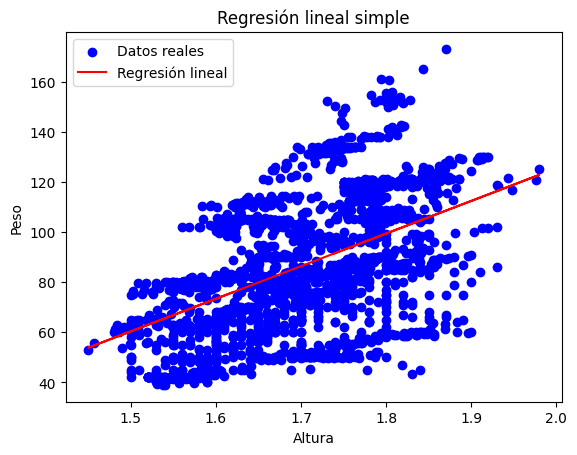

In [10]:
# visualizar el modelo de regrecion.
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.title('Regresión lineal simple')
plt.show()

**Regrecion lineal multiple**

In [11]:
# Definir las variables independientes (x) y dependiente (y) para la regresión lineal múltiple
X = df[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE',]]
y = df['Weight']

In [12]:
# Seleccionar solo las columnas numéricas para calcular la correlación
df_numeric = df.select_dtypes(include=np.number)

correlaciones = df_numeric.corr()
print(correlaciones['Weight'].sort_values(ascending=False))

Weight    1.000000
Height    0.463136
FCVC      0.216125
Age       0.202560
CH2O      0.200575
NCP       0.107469
FAF      -0.051436
TUE      -0.071561
Name: Weight, dtype: float64


In [13]:
# Crear el modelo de regresión lineal múltiple
modelo_multiple = LinearRegression()

# Ajustar el modelo
modelo_multiple.fit(X, y)

LinearRegression()

In [14]:
# Coeficientes y constante
coeficientes = modelo_multiple.coef_
intercepto = modelo_multiple.intercept_

# Mostrar la ecuación
for i, col in enumerate(X.columns):
    print(f"{col}: {coeficientes[i]:.2f}")
print(f"Intercepto: {intercepto:.2f}")

Age: 0.77
Height: 143.24
FCVC: 11.16
NCP: 0.04
CH2O: 5.03
FAF: -6.12
TUE: -0.42
Intercepto: -206.55


In [15]:
# Evaluar el modelo de regresión lineal múltiple

# Predicciones
y_pred_multiple = modelo_multiple.predict(X)

# MSE - Error cuadrático medio
mse_multiple = mean_squared_error(y, y_pred_multiple)

# RMSE - Raíz del error cuadrático medio
rmse_multiple = np.sqrt(mse_multiple)

# MAE - Error absoluto medio
mae_multiple = mean_absolute_error(y, y_pred_multiple)

# MAPE - Error porcentual absoluto medio
mape_multiple = np.mean(np.abs((y - y_pred_multiple) / y)) * 100

# R² (coeficiente de determinación)
r2_multiple = r2_score(y, y_pred_multiple)

# Mostrar resultados
print("Métricas de evaluación para la Regresión Lineal Múltiple:")
print(f"MSE: {mse_multiple:.2f}")
print(f"RMSE: {rmse_multiple:.2f}")
print(f"MAE: {mae_multiple:.2f}")
print(f"MAPE: {mape_multiple:.2f}%")
print(f"R²: {r2_multiple:.2f}")

Métricas de evaluación para la Regresión Lineal Múltiple:
MSE: 440.34
RMSE: 20.98
MAE: 17.07
MAPE: 22.10%
R²: 0.36


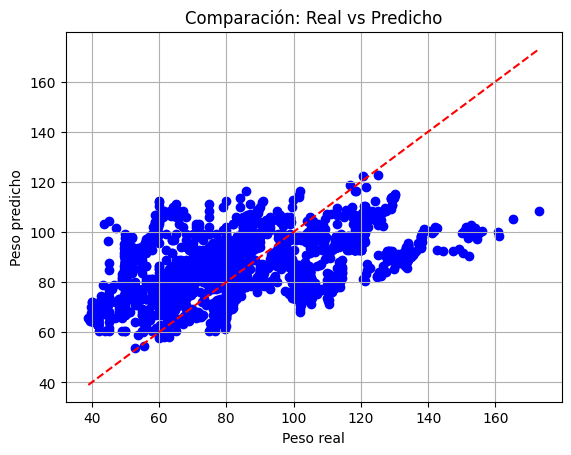

In [16]:
#Gráfico de valores reales vs predichos
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Peso real')
plt.ylabel('Peso predicho')
plt.title('Comparación: Real vs Predicho')
plt.grid(True)
plt.show()

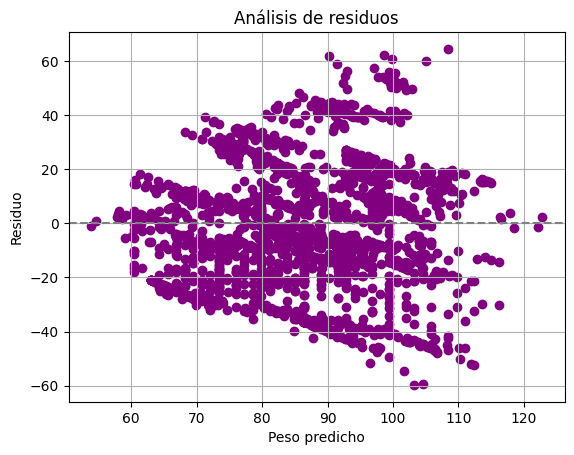

In [17]:
#Gráfico de residuos
residuos = y - y_pred

plt.scatter(y_pred, residuos, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Peso predicho')
plt.ylabel('Residuo')
plt.title('Análisis de residuos')
plt.grid(True)
plt.show()

In [18]:
#Validación de multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Crear DataFrame con las variables independientes
X_vif = df[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

  Variable        VIF
0      Age  16.852242
1   Height  63.674093
2     FCVC  20.315693
3      NCP  13.813099
4     CH2O  12.526867
5      FAF   2.635782
6      TUE   2.382156


**combinación para mejorar el R²**

In [19]:
#Evaluar correlación con la variable objetivo (Weight)
correlaciones = df[['Weight', 'Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']].corr()
print(correlaciones['Weight'].sort_values(ascending=False))

Weight    1.000000
Height    0.463136
FCVC      0.216125
Age       0.202560
CH2O      0.200575
NCP       0.107469
FAF      -0.051436
TUE      -0.071561
Name: Weight, dtype: float64


In [20]:
#Altura y Edad
X1 = df[['Height', 'Age']]
modelo1 = LinearRegression().fit(X1, df['Weight'])
r2_1 = r2_score(df['Weight'], modelo1.predict(X1))
print(f"R² Modelo 1: {r2_1:.2f}")

R² Modelo 1: 0.26


In [21]:
#Altura, Edad, FCVC, CH2O
X2 = df[['Height', 'Age', 'FCVC', 'CH2O']]
modelo2 = LinearRegression().fit(X2, df['Weight'])
r2_2 = r2_score(df['Weight'], modelo2.predict(X2))
print(f"R² Modelo 2: {r2_2:.2f}")

R² Modelo 2: 0.32


In [22]:
#Todas las variables
X3 = df[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
modelo3 = LinearRegression().fit(X3, df['Weight'])
r2_3 = r2_score(df['Weight'], modelo3.predict(X3))
print(f"R² Modelo 3: {r2_3:.2f}")

R² Modelo 3: 0.36


**Visualizar outliers con boxplots para menjorar el MAPE**

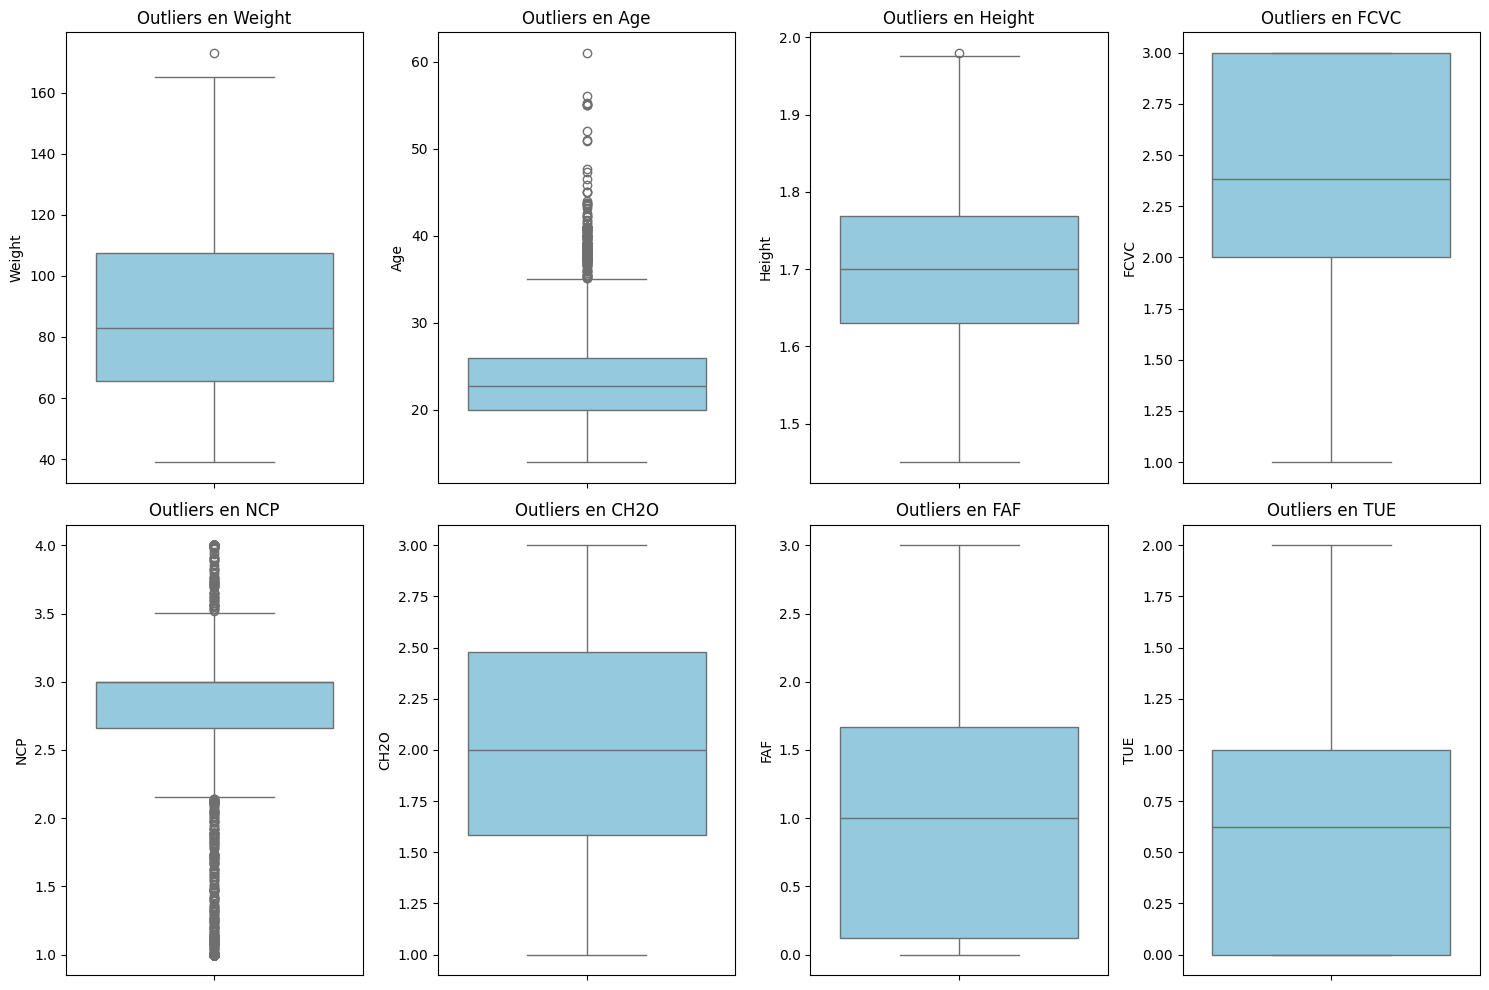

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Weight', 'Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df, y=var, color='skyblue')
    plt.title(f'Outliers en {var}')
    plt.tight_layout()

In [24]:
#Identificar outliers numéricamente
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

# Ejemplo para 'Weight'
outliers_peso = detectar_outliers(df, 'Weight')
print(f"Outliers detectados en 'Weight': {len(outliers_peso)}")

Outliers detectados en 'Weight': 1


In [25]:
#Eliminar o tratar outliers
from scipy.stats.mstats import winsorize

df['Weight_wins'] = winsorize(df['Weight'], limits=[0.05, 0.05])

📊 Métricas del modelo ajustado:
MSE: 470.47
RMSE: 21.69
MAE: 17.87
MAPE: 22.59%
R²: 0.33


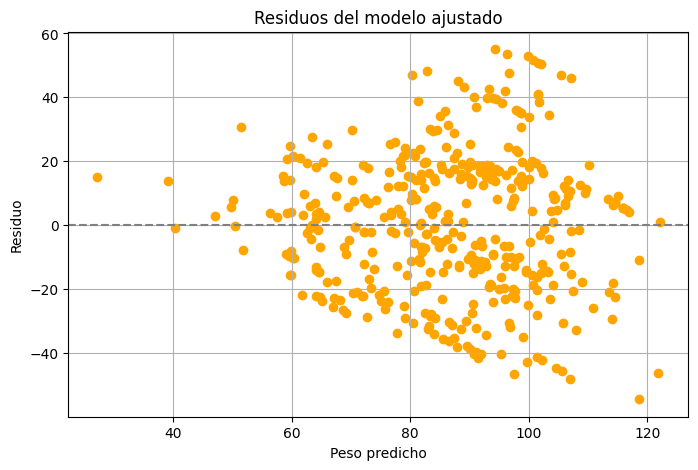

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Paso 1: Eliminar outliers en 'Weight' usando IQR
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

df_limpio = df[(df['Weight'] >= limite_inf) & (df['Weight'] <= limite_sup)]

# Paso 2: Selección de variables
X = df_limpio[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
y = df_limpio['Weight']

# Paso 3: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Paso 5: Predicción y evaluación
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Paso 6: Mostrar métricas
print("📊 Métricas del modelo ajustado:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

# Paso 7: Visualización de residuos
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, color='orange')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Peso predicho')
plt.ylabel('Residuo')
plt.title('Residuos del modelo ajustado')
plt.grid(True)

**mejorar el rendimiento del modelo y reducir el MAPE**

In [27]:
#Transformación logarítmica de la variable objetivo (Weight)
#Transformar y entrenar
# Transformar la variable objetivo
df_limpio['log_Weight'] = np.log(df_limpio['Weight'])

# División de datos
X = df_limpio[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
y_log = df_limpio['log_Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_log = LinearRegression()
modelo_log.fit(X_train, y_train)

# Predicción y reversión de log
y_pred_log = np.exp(modelo_log.predict(X_test))
y_test_real = np.exp(y_test)

/tmp/ipython-input-1611880226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['log_Weight'] = np.log(df_limpio['Weight'])


In [28]:
#Evaluar
mape_log = np.mean(np.abs((y_test_real - y_pred_log) / y_test_real)) * 100
print(f"MAPE con transformación logarítmica: {mape_log:.2f}%")

MAPE con transformación logarítmica: 22.00%


In [29]:
#Escalado de variables independientes
from sklearn.preprocessing import StandardScaler

X = df_limpio[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
y = df_limpio['Weight']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

modelo_scaled = LinearRegression()
modelo_scaled.fit(X_train, y_train)
y_pred_scaled = modelo_scaled.predict(X_test)

In [30]:
mape_scaled = np.mean(np.abs((y_test - y_pred_scaled) / y_test)) * 100
print(f"MAPE con escalado de variables: {mape_scaled:.2f}%")

MAPE con escalado de variables: 22.59%


In [31]:
#Transformación logarítmica de la variable objetivo
# Transformar la variable objetivo
df_limpio['log_Weight'] = np.log(df_limpio['Weight'])

# Variables independientes
X = df_limpio[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
y_log = df_limpio['log_Weight']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_log = LinearRegression()
modelo_log.fit(X_train, y_train)

# Predicción y reversión del log
y_pred_log = np.exp(modelo_log.predict(X_test))
y_test_real = np.exp(y_test)

# Evaluación
mape_log = np.mean(np.abs((y_test_real - y_pred_log) / y_test_real)) * 100
print(f"MAPE con transformación logarítmica: {mape_log:.2f}%")

MAPE con transformación logarítmica: 22.00%


/tmp/ipython-input-668562970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['log_Weight'] = np.log(df_limpio['Weight'])


**Selección automática de variables (feature selection)**

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

# Variables independientes y objetivo
X = df_limpio[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
y = df_limpio['Weight']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Mostrar puntuaciones
scores = selector.scores_
for var, score in zip(X.columns, scores):
    print(f"{var}: {score:.2f}")

Age: 92.19
Height: 571.61
FCVC: 102.20
NCP: 24.47
CH2O: 88.86
FAF: 6.03
TUE: 11.18


In [33]:
#Elegir las mejores variables
X_reducido = df_limpio[['Height', 'Age', 'FCVC', 'CH2O']]

In [34]:
#Reentrenar el modelo con variables seleccionadas
X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

modelo_reducido = LinearRegression()
modelo_reducido.fit(X_train, y_train)
y_pred_reducido = modelo_reducido.predict(X_test)

mape_reducido = np.mean(np.abs((y_test - y_pred_reducido) / y_test)) * 100
print(f"MAPE con variables seleccionadas: {mape_reducido:.2f}%")

MAPE con variables seleccionadas: 23.15%


**Modelo Random Forest**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Paso 1: Datos limpios y variables
X = df_limpio[['Age','Height', 'FCVC','NCP', 'CH2O','FAF','TUE']]
y = df_limpio['Weight']

# Paso 2: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Paso 4: Predicción y evaluación
y_pred_rf = modelo_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# Paso 5: Mostrar métricas
print("📊 Métricas del modelo Random Forest:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")
print(f"R²: {r2_rf:.2f}")

📊 Métricas del modelo Random Forest:
MSE: 117.49
RMSE: 10.84
MAE: 6.81
MAPE: 9.15%
R²: 0.83


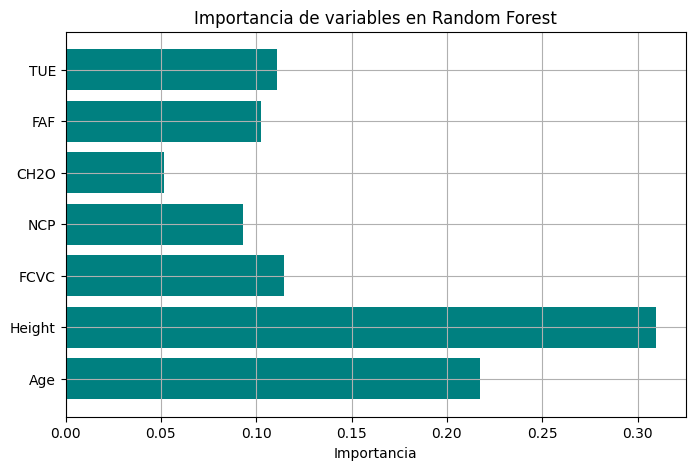

In [36]:
import matplotlib.pyplot as plt

importancias = modelo_rf.feature_importances_
variables = X.columns

plt.figure(figsize=(8,5))
plt.barh(variables, importancias, color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de variables en Random Forest')
plt.grid(True)
plt.show()

**comprobando variables**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de variables
variables = ['Height', 'Age', 'FCVC', 'CH2O', 'NCP', 'FAF', 'TUE']
resultados = []

# Bucle para entrenar y evaluar cada modelo
for var in variables:
    X = df_limpio[[var]]
    y = df_limpio['Weight']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    resultados.append((var, round(mape, 2)))

# Mostrar resultados ordenados
resultados_ordenados = sorted(resultados, key=lambda x: x[1])
print("📊 MAPE por regresión lineal simple:")
for var, mape in resultados_ordenados:
    print(f"{var}: {mape}%")

📊 MAPE por regresión lineal simple:
Height: 25.03%
CH2O: 27.39%
Age: 27.64%
FCVC: 27.78%
TUE: 28.29%
FAF: 28.41%
NCP: 28.58%
